# Pre-analysis of AuGe 15kV Ptychography data

In [28]:
%matplotlib inline
import numpy as np
import h5py
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
import hyperspy.api as hs
import os

2020-06-18 10:39:21,249:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


### Lazy Hyperspy load of full 4D dataset

In [36]:
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/MoS2_15kV_100umClAp_3Mx_focus_A2_1p07.hdf5'
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 152207/MoS2_15kV_100umClAp_3Mx_154def_A2_1p07_db.hdf5'

#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 160759/AuonGe_15kV_100umClAp_3Mx_def154_A2_1p07.hdf5'
fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 160536/AuonGe_15kV_100umClAp_3Mx_def77_A2_1p07scan_array_253by255_diff_plane_515by515_.hdf5'
#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 154728/AuonGe_15kV_100umClAp_3Mx_focus_A2_1p07.hdf5'
d = hs.load(fp, lazy = True)

#reset navigation offset
d.axes_manager.navigation_axes[0].offset = 0
d.axes_manager.navigation_axes[1].offset = 0

### Take every nth probe position so can quickly visualise data

In [37]:
d_sub = d.inav[::1, ::1]
d_sub.compute()

[########################################] | 100% Completed |  3min 17.3s


In [38]:
%matplotlib qt 
#pop out plot - you may need to run this a couple of times

2020-06-18 10:52:47,048:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.


In [39]:
px_in_crop = 64
d_sub.plot()
sq_roi = hs.roi.RectangularROI(0,0,px_in_crop,px_in_crop)
roi_dat = sq_roi.interactive(d_sub)

2020-06-18 10:53:07,285:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd945682278>
2020-06-18 10:53:07,286:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 10:53:07,287:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd945682278>
2020-06-18 10:53:07,288:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 10:53:07,437:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd8c3dedfd0>
2020-06-18 10:53:07,438:/dls_sw/apps/python/a

In [40]:
%matplotlib inline
#return to inline

2020-06-18 10:53:29,382:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-06-18 10:53:54,686:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd8d422c390>
2020-06-18 10:53:54,687:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 10:53:54,688:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd8d422c390>
2020-06-18 10:53:54,689:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 10:53:54,884:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd8d43f6240>
2020-06-18 10:53:54,885:/dls_sw/apps/python/a

RectangularROI(left=60, top=109, right=124, bottom=173)


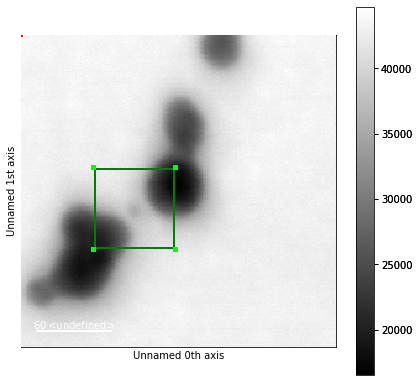

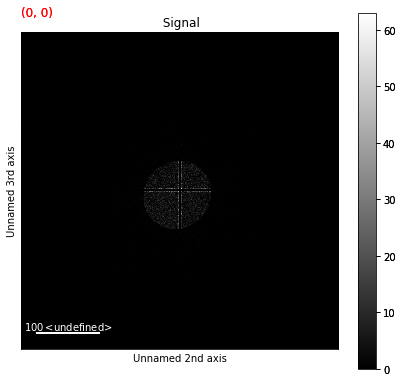

In [41]:
#show area to be cropped
d_sub.plot()
roi_dat = sq_roi.interactive(d_sub)
print(sq_roi)

[########################################] | 100% Completed | 10.5s


2020-06-18 10:54:47,656:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd94553c668>
2020-06-18 10:54:47,658:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-18 10:54:47,659:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd94553c668>
2020-06-18 10:54:47,659:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-18 10:54:47,848:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fd94541c278>
2020-06-18 10:54:47,849:/dls_sw/apps/python/a

(64, 64, 515, 515)


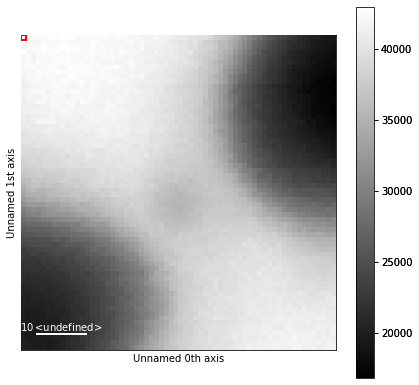

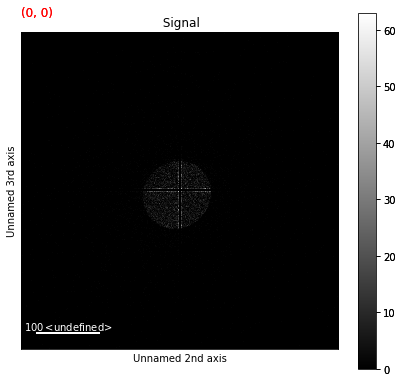

In [42]:
d_crop = sq_roi(d)
d_crop.compute()
d_crop.plot()
print(d_crop.data.shape)

### Create Mosaic

In [47]:
data = np.array(d_crop.data, dtype=np.float64)
data = data[::4,::4,::1,::1]
data_tile = ptyrex.core.toolbox.cut2(data, [128,128])
data_bin = np.copy(data_tile)
data_bin = ptyrex.core.toolbox.bin(data_bin, 128)
data_tile = ptyrex.core.toolbox.bin(data_tile, 8)
data_tile = np.abs(ptyrex.core.toolbox.tile(data_tile))
print(data_tile.shape)

(256, 256)


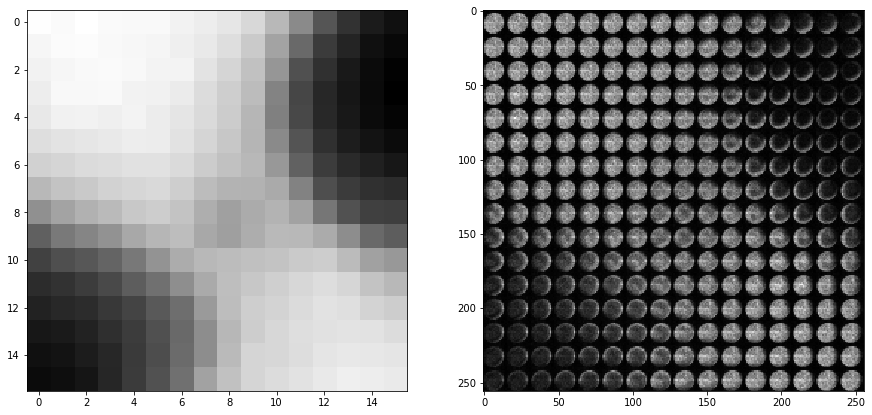

In [48]:
import matplotlib.pyplot as plt
#%matplotlib qt5
plt.figure(figsize=[15,10])
plt.subplot(1,2,1)
plt.imshow(np.squeeze(data_bin))
plt.subplot(1,2,2)
plt.imshow(data_tile)
plt.gray()
plt.show()